# Done by Deboleen Bhowal

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime, timedelta

In [ ]:
path='D:/python/projects/NatWest/HealthApp.log'

In [ ]:
columns=['Time', 'Component',	'Pid',	'Content']

In [ ]:
# Initialize an empty list to store dictionaries
log_data = []

In [ ]:
with open(path, 'r') as file:
    log_entries = file.readlines()

# Process each log entry
for entry in log_entries:
    # Split the entry into fields (adjust this based on your log format)
    fields = entry.strip().split('|')  # Change '|' to the delimiter used in your log file

    # Create a dictionary for the log entry
    log_entry = dict(zip(columns, fields))

    # Append the log entry dictionary to the list
    log_data.append(log_entry)

In [ ]:
# Create a Pandas DataFrame from the list of dictionaries
df = pd.DataFrame(log_data)

In [ ]:
df

,Time,Component,Pid,Content
0,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579
1,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4
2,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON
3,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...
4,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data
...,...,...,...,...
253390,201813-9:56:6:942,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=52108
253391,201813-9:56:6:949,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=60
253392,201813-9:57:0:118,Step_LSC,30002312,processHandleBroadcastAction action:android.in...
253393,201813-9:58:0:181,Step_LSC,30002312,processHandleBroadcastAction action:android.in...


In [ ]:
df['Time']=pd.to_datetime(df['Time'],  format='%Y%m%d-%H:%M:%S:%f', infer_datetime_format=True, errors='coerce')

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\3460035795.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Time']=pd.to_datetime(df['Time'],  format='%Y%m%d-%H:%M:%S:%f', infer_datetime_format=True, errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253395 entries, 0 to 253394
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       253394 non-null  datetime64[ns]
 1   Component  253395 non-null  object        
 2   Pid        253395 non-null  object        
 3   Content    253395 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.7+ MB


In [ ]:
# Replace NaT from the next valid value in: 'Time'
df = df.fillna({'Time': df['Time'].bfill()})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253395 entries, 0 to 253394
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Time       253395 non-null  datetime64[ns]
 1   Component  253395 non-null  object        
 2   Pid        253395 non-null  object        
 3   Content    253395 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 7.7+ MB


In [ ]:
df['Time'].value_counts()

Time
2017-12-25 15:46:48.360    51
2017-12-25 13:37:49.376    51
2017-12-29 11:22:55.739    46
2017-12-25 15:46:48.359    40
2017-12-29 17:55:26.414    39
                           ..
2017-12-27 08:31:39.145     1
2017-12-27 08:31:39.435     1
2017-12-27 08:31:39.436     1
2017-12-27 08:31:39.446     1
2018-01-03 09:59:00.950     1
Name: count, Length: 207509, dtype: int64

In [ ]:
general_df=df

In [ ]:
general_df['Time'] = general_df['Time'].apply(lambda x: x.strftime('%Y%m%d-%H:%M'))

In [ ]:
general_df

,Time,Component,Pid,Content
0,20171223-22:15,Step_LSC,30002312,onStandStepChanged 3579
1,20171223-22:15,Step_LSC,30002312,onExtend:1514038530000 14 0 4
2,20171223-22:15,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON
3,20171223-22:15,Step_LSC,30002312,processHandleBroadcastAction action:android.in...
4,20171223-22:15,Step_StandStepCounter,30002312,flush sensor data
...,...,...,...,...
253390,20180103-09:56,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=52108
253391,20180103-09:56,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=60
253392,20180103-09:57,Step_LSC,30002312,processHandleBroadcastAction action:android.in...
253393,20180103-09:58,Step_LSC,30002312,processHandleBroadcastAction action:android.in...


In [ ]:
# Filter rows based on column: 'Time'
new_df = general_df[(general_df['Time'] == "20171223-23:57") | (general_df['Time'] == "20171224-23:57") | (general_df['Time'] == "20171225-23:47") | (general_df['Time'] == "20171226-23:58") | (general_df['Time'] == "20171227-23:56") | (general_df['Time'] == "20171228-23:33") | (general_df['Time'] == "20171229-22:20") | (general_df['Time'] == "20171230-23:41") | (general_df['Time'] == "20171231-23:52") | (general_df['Time'] == "20180101-22:36") | (general_df['Time'] == "20180102-23:53") | (general_df['Time'] == "20180103-09:56")]

In [ ]:
new_df = new_df.drop_duplicates(subset=['Content'])

In [ ]:
new_df

,Time,Component,Pid,Content
1761,20171223-23:57,Step_LSC,30002312,processHandleBroadcastAction action:android.in...
1762,20171223-23:57,Step_LSC,30002312,onStandStepChanged 3786
1763,20171223-23:57,Step_LSC,30002312,onExtend:1514044654000 0 0 5
1764,20171223-23:57,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514044500000##721...
1765,20171223-23:57,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514044560000##7214##...
...,...,...,...,...
253382,20180103-09:56,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514944500000##157...
253383,20180103-09:56,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514944500000##1570##...
253387,20180103-09:56,Step_LSC,30002312,onExtend:1514944566000 0 0 0
253388,20180103-09:56,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514944500000##157...


In [ ]:
data= new_df['Content']

In [ ]:
data

1761      processHandleBroadcastAction action:android.in...
1762                                onStandStepChanged 3786
1763                           onExtend:1514044654000 0 0 5
1764       getTodayTotalDetailSteps = 1514044500000##721...
1765      setTodayTotalDetailSteps=1514044560000##7214##...
                                ...                        
253382     getTodayTotalDetailSteps = 1514944500000##157...
253383    setTodayTotalDetailSteps=1514944500000##1570##...
253387                         onExtend:1514944566000 0 0 0
253388     getTodayTotalDetailSteps = 1514944500000##157...
253389    setTodayTotalDetailSteps=1514944500000##1570##...
Name: Content, Length: 164, dtype: object

In [ ]:
# Extract stand step changed values
stand_step_changed_pattern = re.compile(r'onStandStepChanged (\d+)')
new_df['StandStepChanged'] = new_df['Content'].str.extract(stand_step_changed_pattern, expand=False).astype(float)

# Extract calories values
calories_pattern = re.compile(r'calculateCaloriesWithCache totalCalories=(\d+)')
new_df['Calories'] = new_df['Content'].str.extract(calories_pattern, expand=False).astype(float)

# Extract altitude values
altitude = re.compile(r'calculateAltitudeWithCache totalAltitude=(\d+)')
new_df['Altitude'] = new_df['Content'].str.extract(altitude, expand=False).astype(float)



In [ ]:
new_df

,Time,Component,Pid,Content,StandStepChanged,Calories,Altitude
1761,20171223-23:57,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,NaN,NaN,NaN
1762,20171223-23:57,Step_LSC,30002312,onStandStepChanged 3786,3786.0,NaN,NaN
1763,20171223-23:57,Step_LSC,30002312,onExtend:1514044654000 0 0 5,NaN,NaN,NaN
1764,20171223-23:57,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514044500000##721...,NaN,NaN,NaN
1765,20171223-23:57,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514044560000##7214##...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
253382,20180103-09:56,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514944500000##157...,NaN,NaN,NaN
253383,20180103-09:56,Step_SPUtils,30002312,setTodayTotalDetailSteps=1514944500000##1570##...,NaN,NaN,NaN
253387,20180103-09:56,Step_LSC,30002312,onExtend:1514944566000 0 0 0,NaN,NaN,NaN
253388,20180103-09:56,Step_SPUtils,30002312,getTodayTotalDetailSteps = 1514944500000##157...,NaN,NaN,NaN


In [ ]:
new1_df=new_df.drop(columns=['Pid', 'Component', 'Content'])

In [ ]:
new1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 1761 to 253389
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time              164 non-null    object 
 1   StandStepChanged  16 non-null     float64
 2   Calories          16 non-null     float64
 3   Altitude          11 non-null     float64
dtypes: float64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
new1_df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M')

In [ ]:
new1_df['Time'] = new1_df['Time'].dt.date

In [ ]:
new1_df

,Time,StandStepChanged,Calories,Altitude
1761,2017-12-23,NaN,NaN,NaN
1762,2017-12-23,3786.0,NaN,NaN
1763,2017-12-23,NaN,NaN,NaN
1764,2017-12-23,NaN,NaN,NaN
1765,2017-12-23,NaN,NaN,NaN
...,...,...,...,...
253382,2018-01-03,NaN,NaN,NaN
253383,2018-01-03,NaN,NaN,NaN
253387,2018-01-03,NaN,NaN,NaN
253388,2018-01-03,NaN,NaN,NaN


In [ ]:
new1_df=new1_df.groupby('Time').agg({'StandStepChanged':'sum', 'Calories':'sum', 'Altitude':'sum'})

In [ ]:
new1_df

,StandStepChanged,Calories,Altitude
Time,,,
2017-12-23,3786.0,131208.0,240.0
2017-12-24,11903.0,403392.0,690.0
2017-12-25,26302.0,444495.0,600.0
2017-12-26,5485.0,174714.0,270.0
2017-12-27,12910.0,222571.0,300.0
2017-12-28,18999.0,205737.0,360.0
2017-12-29,23697.0,147120.0,210.0
2017-12-30,45041.0,1572967.0,570.0
2017-12-31,8433.0,309957.0,0.0


In [ ]:
new1_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2017-12-23 to 2018-01-03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   StandStepChanged  12 non-null     float64
 1   Calories          12 non-null     float64
 2   Altitude          12 non-null     float64
dtypes: float64(3)
memory usage: 384.0+ bytes


In [ ]:
new1_df['Time']=new1_df.index

In [ ]:
new1_df

,StandStepChanged,Calories,Altitude,Time
Time,,,,
2017-12-23,3786.0,131208.0,240.0,2017-12-23
2017-12-24,11903.0,403392.0,690.0,2017-12-24
2017-12-25,26302.0,444495.0,600.0,2017-12-25
2017-12-26,5485.0,174714.0,270.0,2017-12-26
2017-12-27,12910.0,222571.0,300.0,2017-12-27
2017-12-28,18999.0,205737.0,360.0,2017-12-28
2017-12-29,23697.0,147120.0,210.0,2017-12-29
2017-12-30,45041.0,1572967.0,570.0,2017-12-30
2017-12-31,8433.0,309957.0,0.0,2017-12-31


C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\2278610488.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time', y='StandStepChanged', data=new1_df, ci=None)


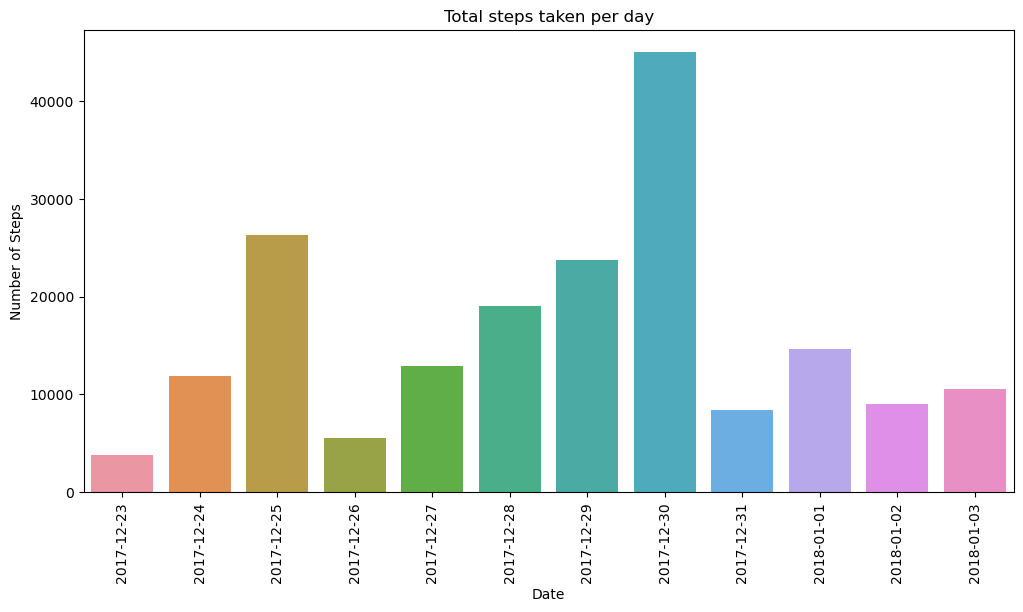

In [ ]:
# Plotting the bar graph for total steps taken each day
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='StandStepChanged', data=new1_df, ci=None)
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.title('Total steps taken per day')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\4119637721.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time', y='Calories', data=new1_df, ci=None)


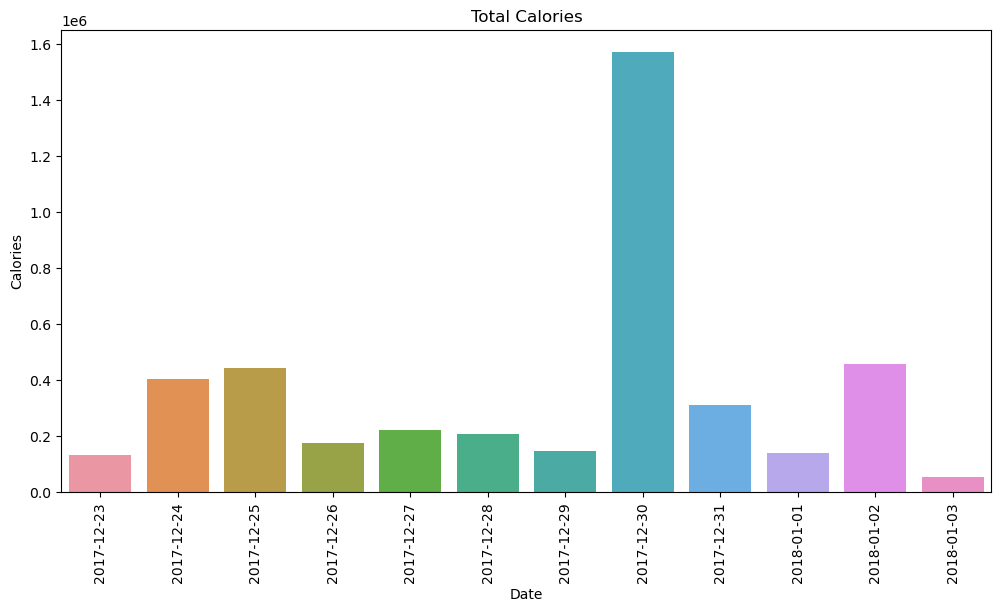

In [ ]:
# Plotting the bar graph for total calories
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Calories', data=new1_df, ci=None)
plt.xlabel('Date')
plt.ylabel('Calories')
plt.title('Total Calories')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\1316751913.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Time', y='Altitude', data=new1_df, ci=None)


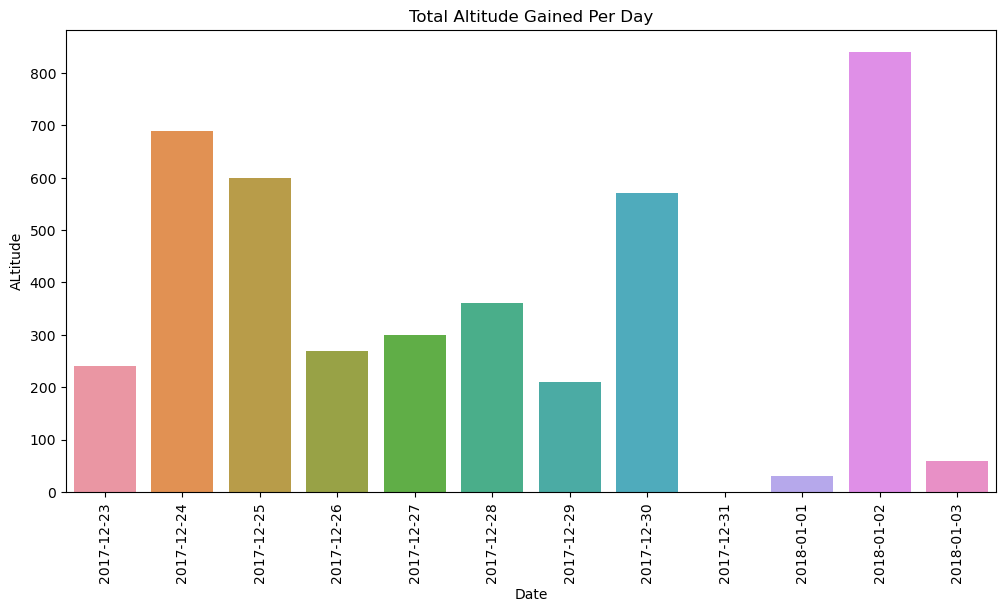

In [ ]:
# Plotting the bar graph for total altitude gained per day
plt.figure(figsize=(12, 6))
sns.barplot(x='Time', y='Altitude', data=new1_df, ci=None)
plt.xlabel('Date')
plt.ylabel('ALtitude')
plt.title('Total Altitude Gained Per Day')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plot_daily_activity_distribution(df):
    # Assuming df is the DataFrame returned from the time function
    total_time_sum = df['total_time'].sum()

    # Convert total time to hours for better visualization
    total_time_hours = total_time_sum / 3600

    # Create a pie chart
    labels = ['Active Time', 'Inactive Time']
    sizes = [total_time_hours, 24 - total_time_hours]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)

    sns.set()
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title(f'Daily Activity (on the app) Distribution - {df["Date"].iloc[1]}')

    # Show the pie chart
    plt.show()

In [ ]:
def plot_total_time_comparison(dfs):
    # Create lists to store total times and dates
    total_times = []
    dates = []

    for df in dfs:
        # Check if 'total_time' column exists in the DataFrame
        if 'total_time' in df.columns:
            total_time_sum = df['total_time'].sum() / 3600
            total_times.append(total_time_sum)

            # Extract date for the DataFrame
            date = df['Date'].iloc[0].strftime('%Y-%m-%d')
            dates.append(date)

    # Create a bar plot
    sns.set()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=dates, y=total_times, palette='viridis')
    plt.xlabel('Date')
    plt.ylabel('Total Time (hours)')
    plt.title('Total in App Active Time Comparison Across Days')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [ ]:
# For getting the person's active time
def time(df):
    n = len(df["Time"])
    df['on_time'] = pd.NaT
    df['off_time'] = pd.NaT
    df['total_time'] = pd.NaT

    for i in range(n):
        if df['Content'].iloc[i] == 'onReceive action: android.intent.action.SCREEN_ON':
            # note the on time
            on_time = df["Time"].iloc[i]

            for k in range(i, n):
                if df['Content'].iloc[k] == 'onReceive action: android.intent.action.SCREEN_OFF':
                    # note the off time
                    off_time = df["Time"].iloc[k]
                    # subtract the off time from the on time and add it to the variable total time
                    total_time = (df["Time"].iloc[k] - df["Time"].iloc[i]).total_seconds()

                    # Update the corresponding row in the DataFrame
                    df.at[i, 'on_time'] = on_time
                    df.at[i, 'off_time'] = off_time
                    df.at[i, 'total_time'] = total_time
                    break

    return plot_daily_activity_distribution(df)

In [ ]:
def plot_calories_burnt_over_time(dataframe):
    # Ensure 'Content' column is not null and contains 'calculateCaloriesWithCache'
    calories_df = dataframe[dataframe['Content'].str.contains('calculateCaloriesWithCache', na=False)]

    if calories_df.empty:
        print("No matching data found for 'calculateCaloriesWithCache'.")
        return

    # Extract calorie values from the "Content" column
    calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)

    # Convert the "Time" column to datetime format
    calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')

    # Extract only the time component from the "Time" column
    calories_df['time'] = calories_df['Time'].dt.strftime('%H:%M:%S')
    calories_df['Date'] = calories_df['Time'].dt.strftime('%Y-%m-%d')

    # Create the plot
    plt.figure(figsize=(50, 8))
    plt.plot(calories_df['time'], calories_df['Calories Burnt'], marker='.', linestyle='-')
    plt.xlabel('Time')
    plt.xticks(rotation=90)
    plt.ylabel('Calories')
    plt.title(f'Calories Taken or Burnt Over Time - {calories_df["Date"].iloc[1]}')
    plt.grid(False)

    # Show the plot
    plt.show()

In [ ]:
df['Time']=pd.to_datetime(df['Time'],  format='%Y%m%d-%H:%M')

In [ ]:
df['Date'] = df['Time'].dt.date

In [ ]:
grouped_by_date = df.groupby('Date')

In [ ]:
# Create a list to store DataFrames for each date
date_dataframes = [group.copy() for _, group in grouped_by_date]

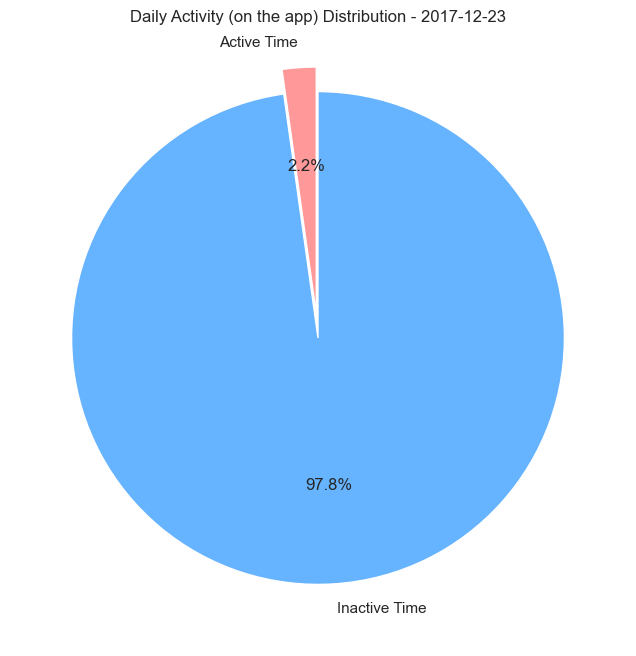

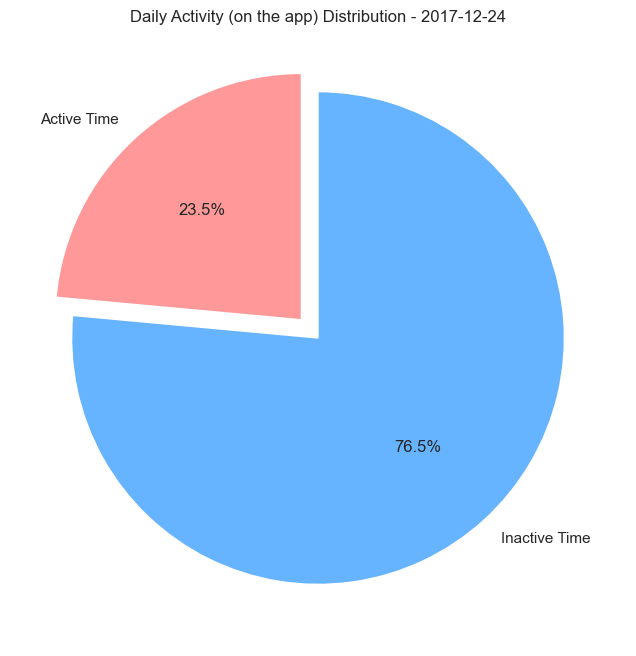

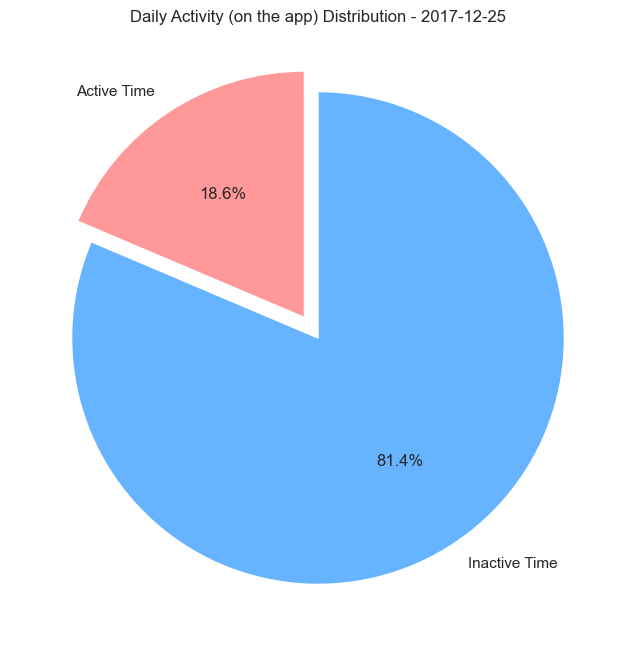

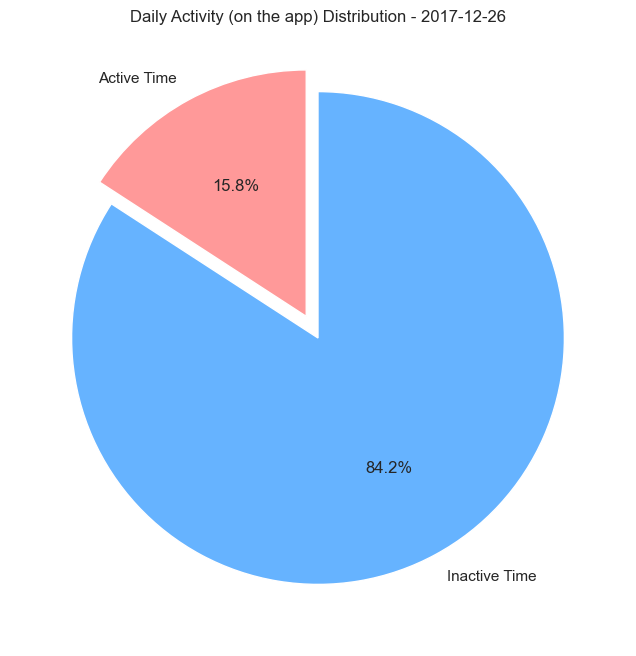

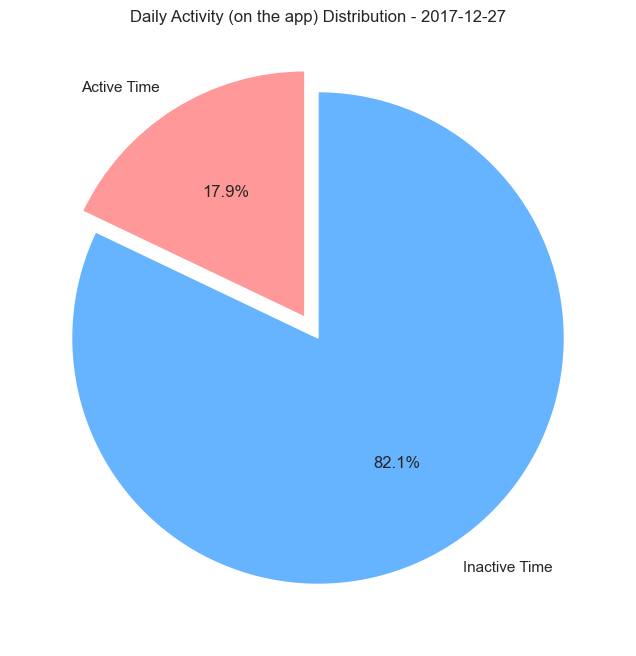

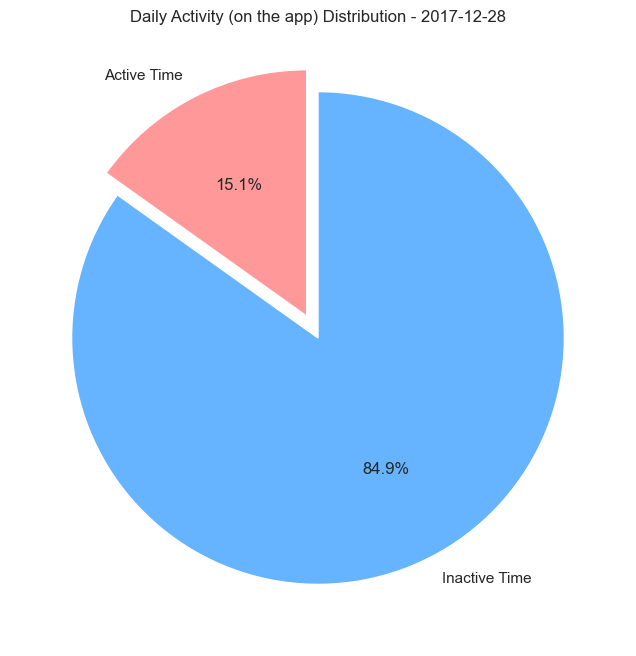

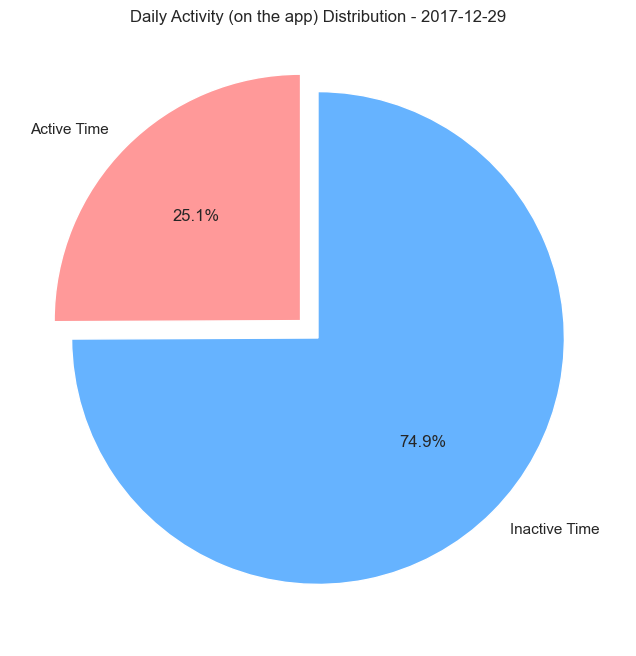

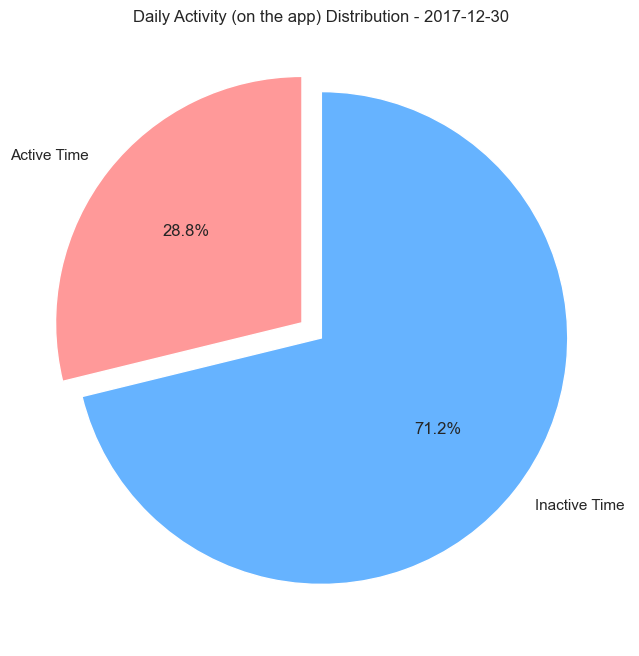

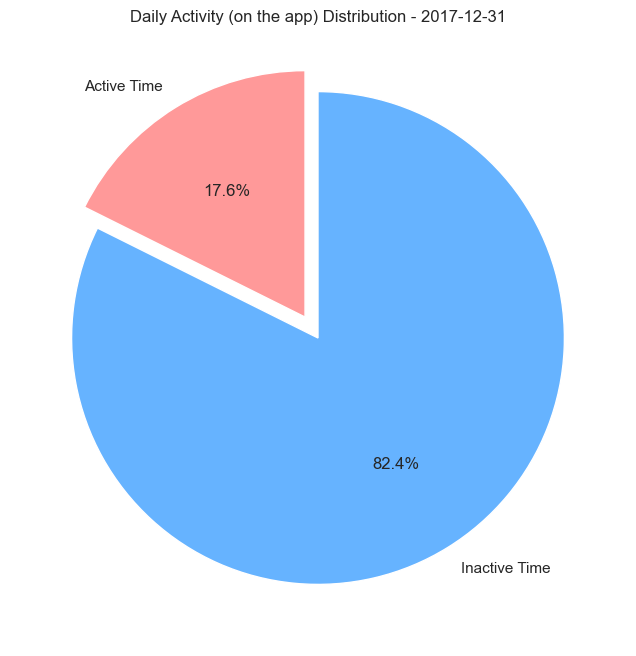

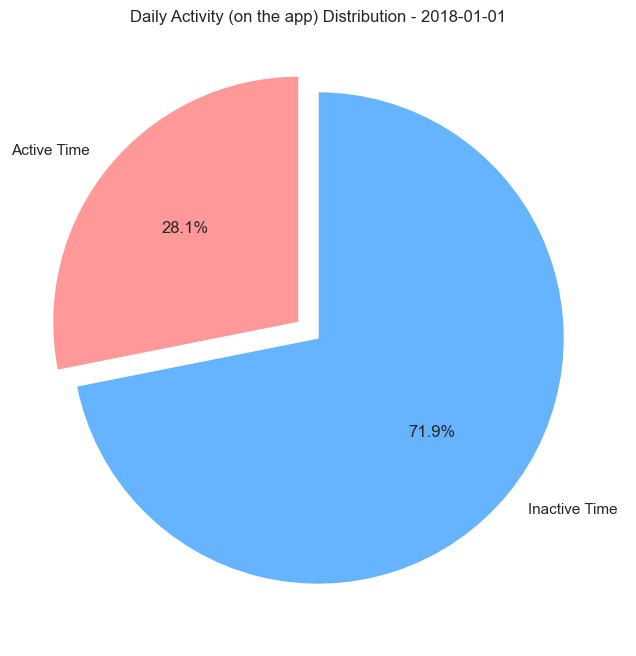

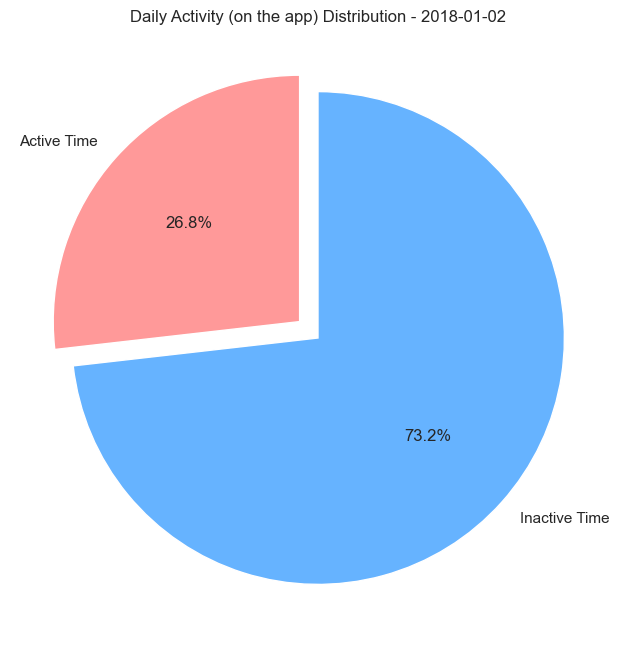

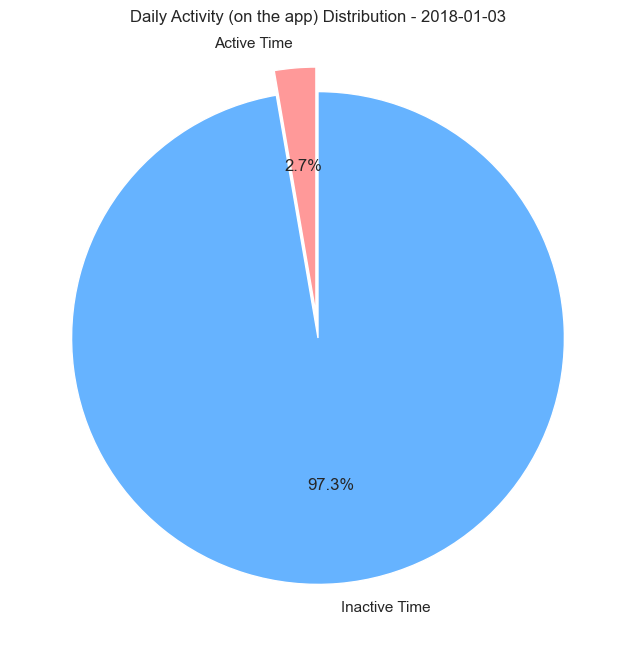

In [ ]:
# Plotting for Activeness on the ap per day
for i, data_df in enumerate(date_dataframes, 1):
    time(data_df)

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

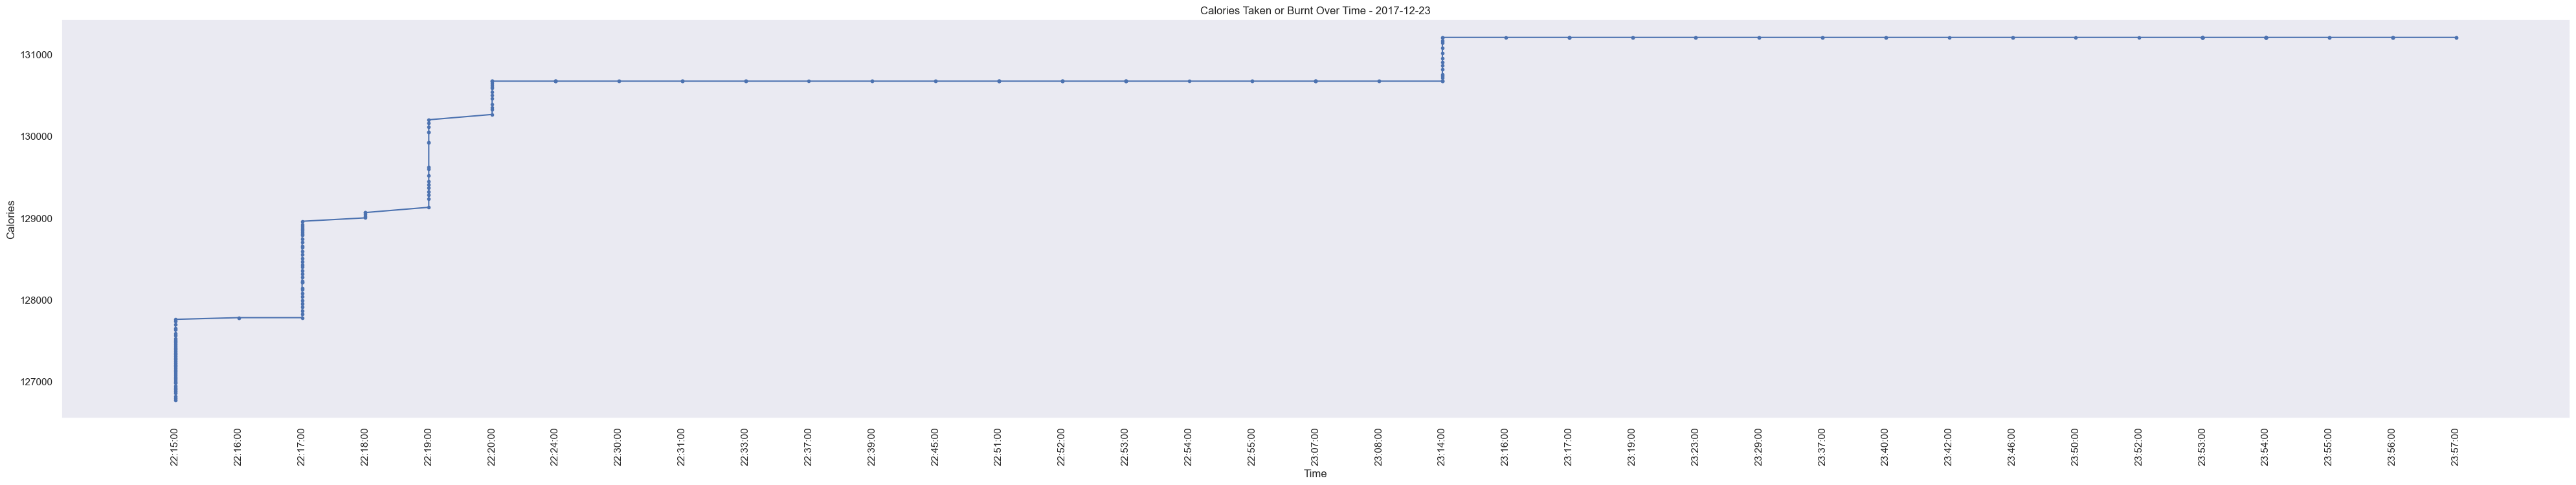

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

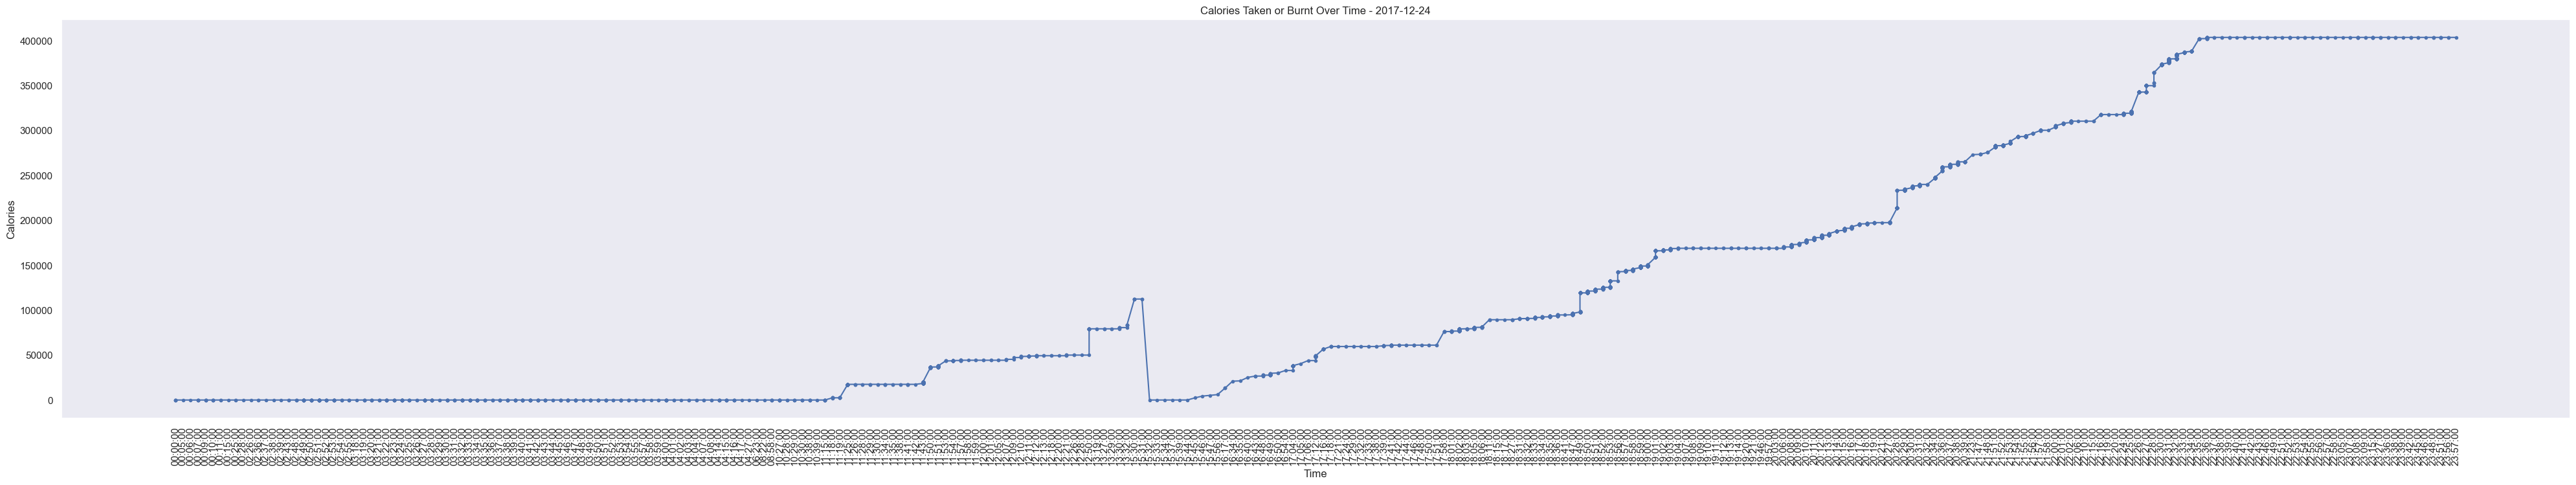

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

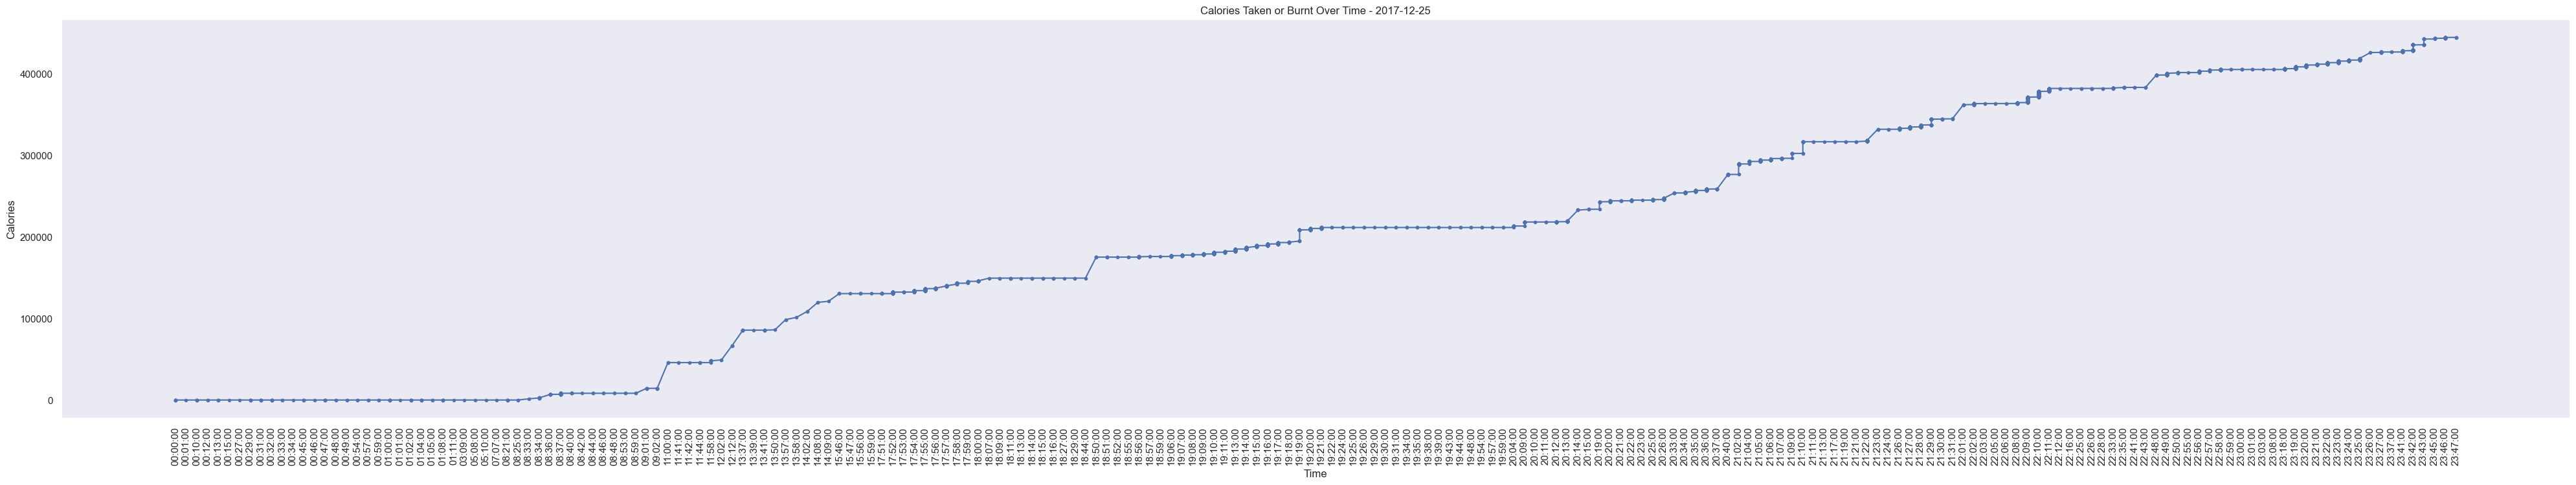

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

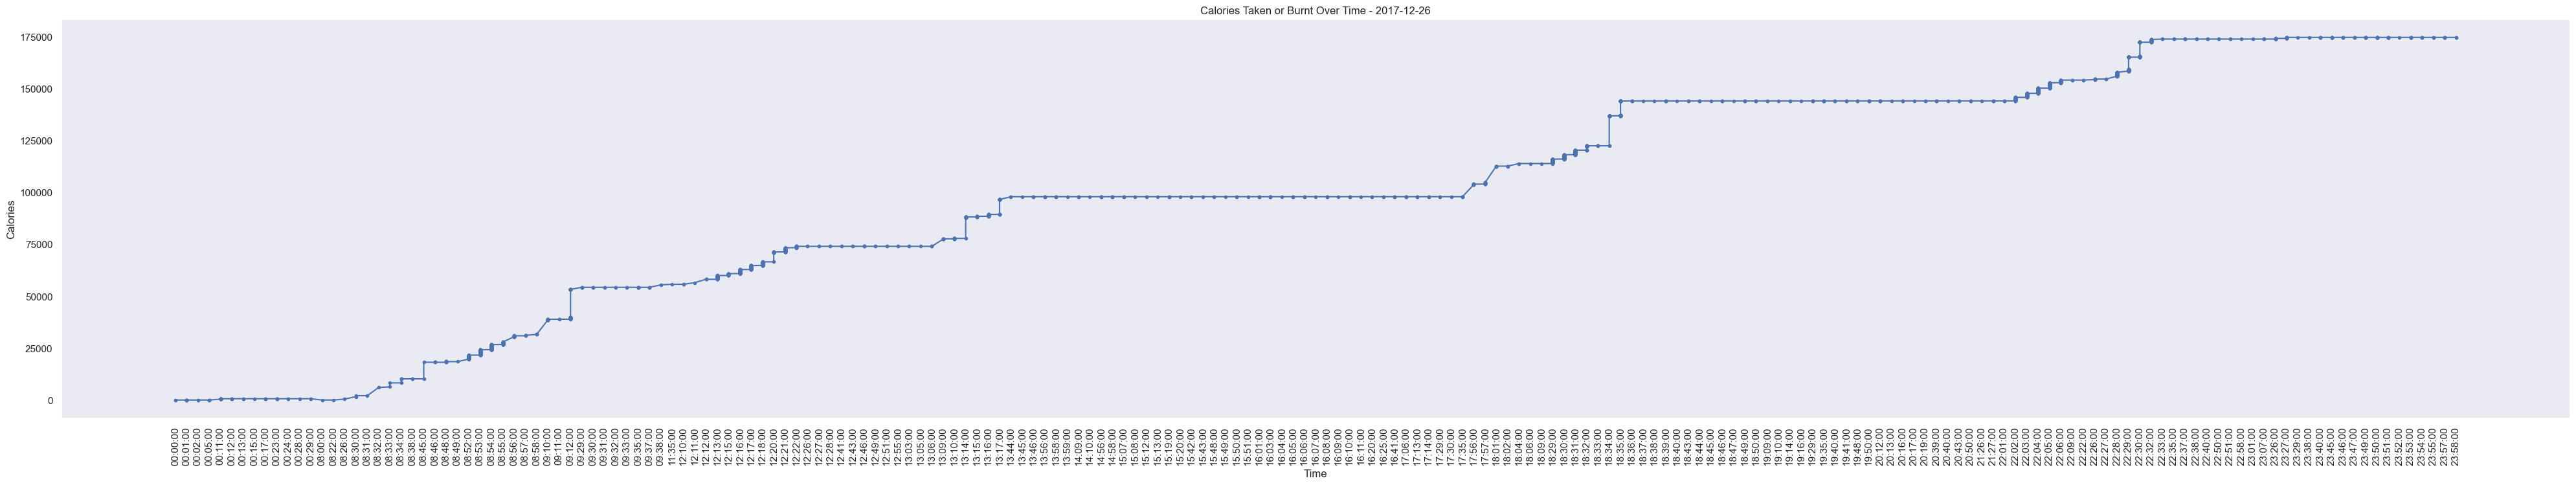

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

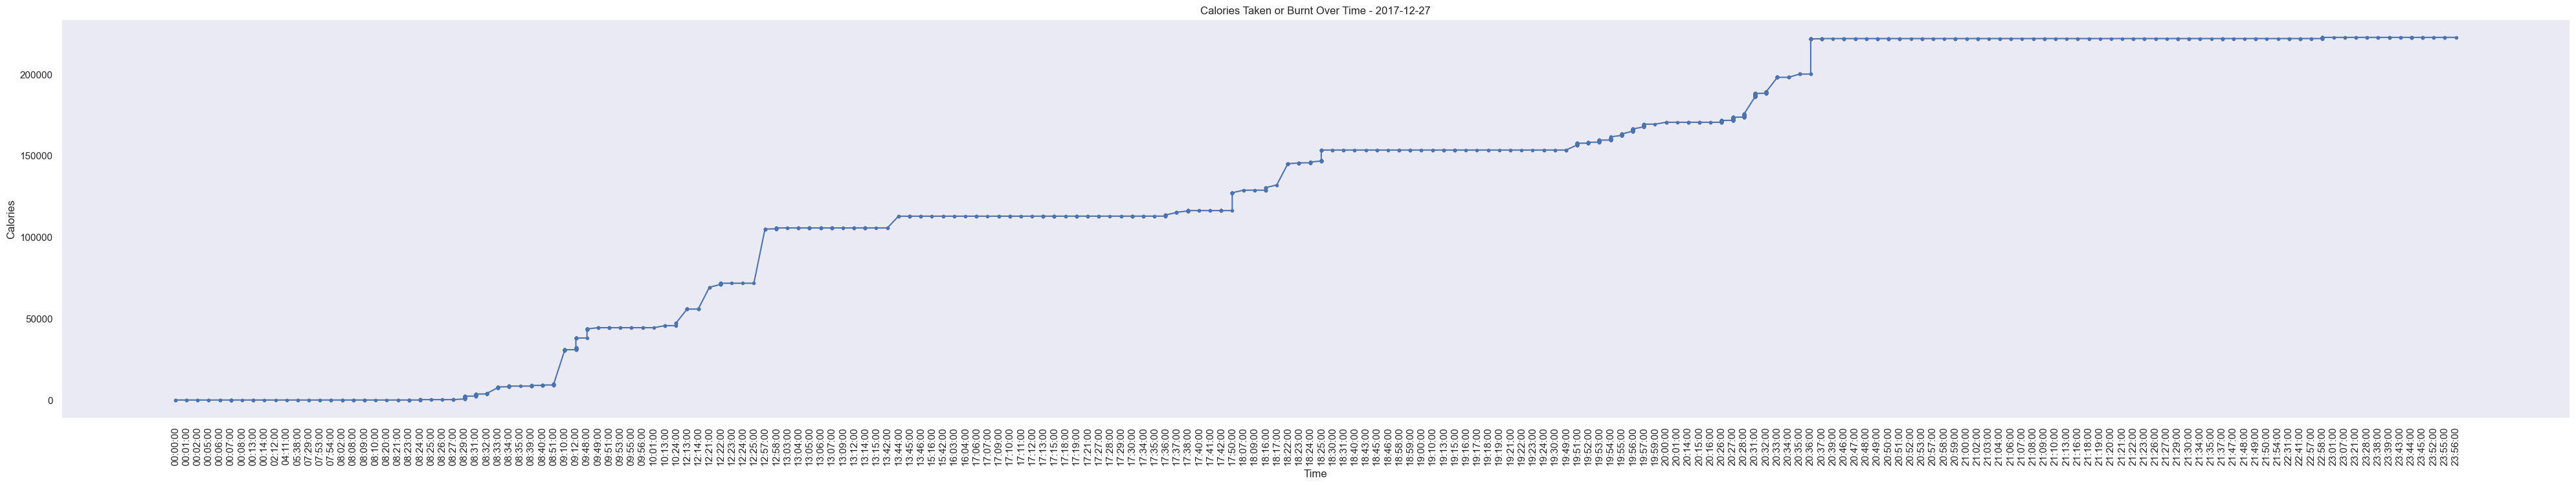

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

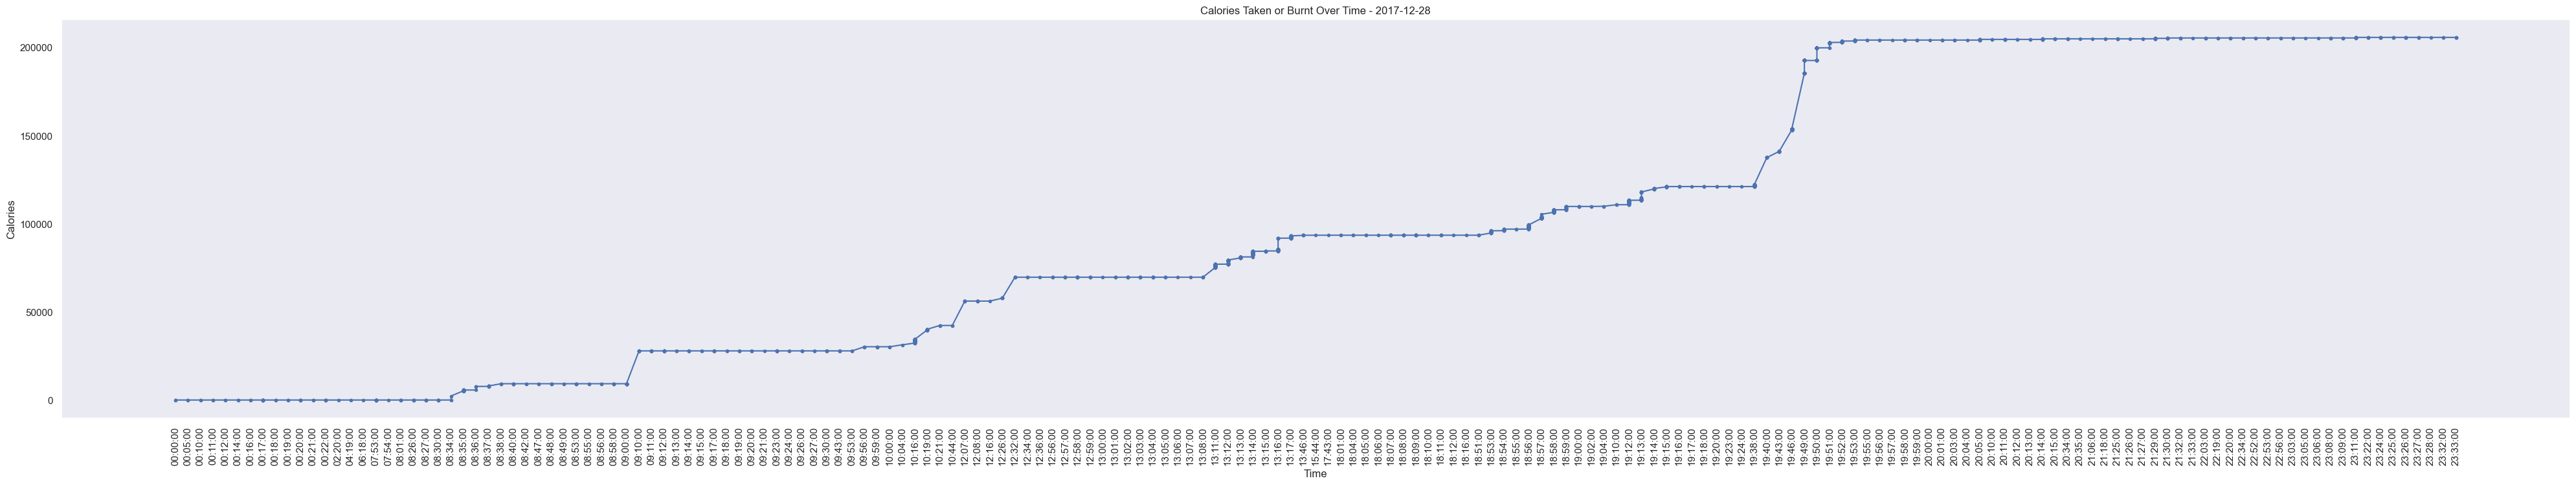

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

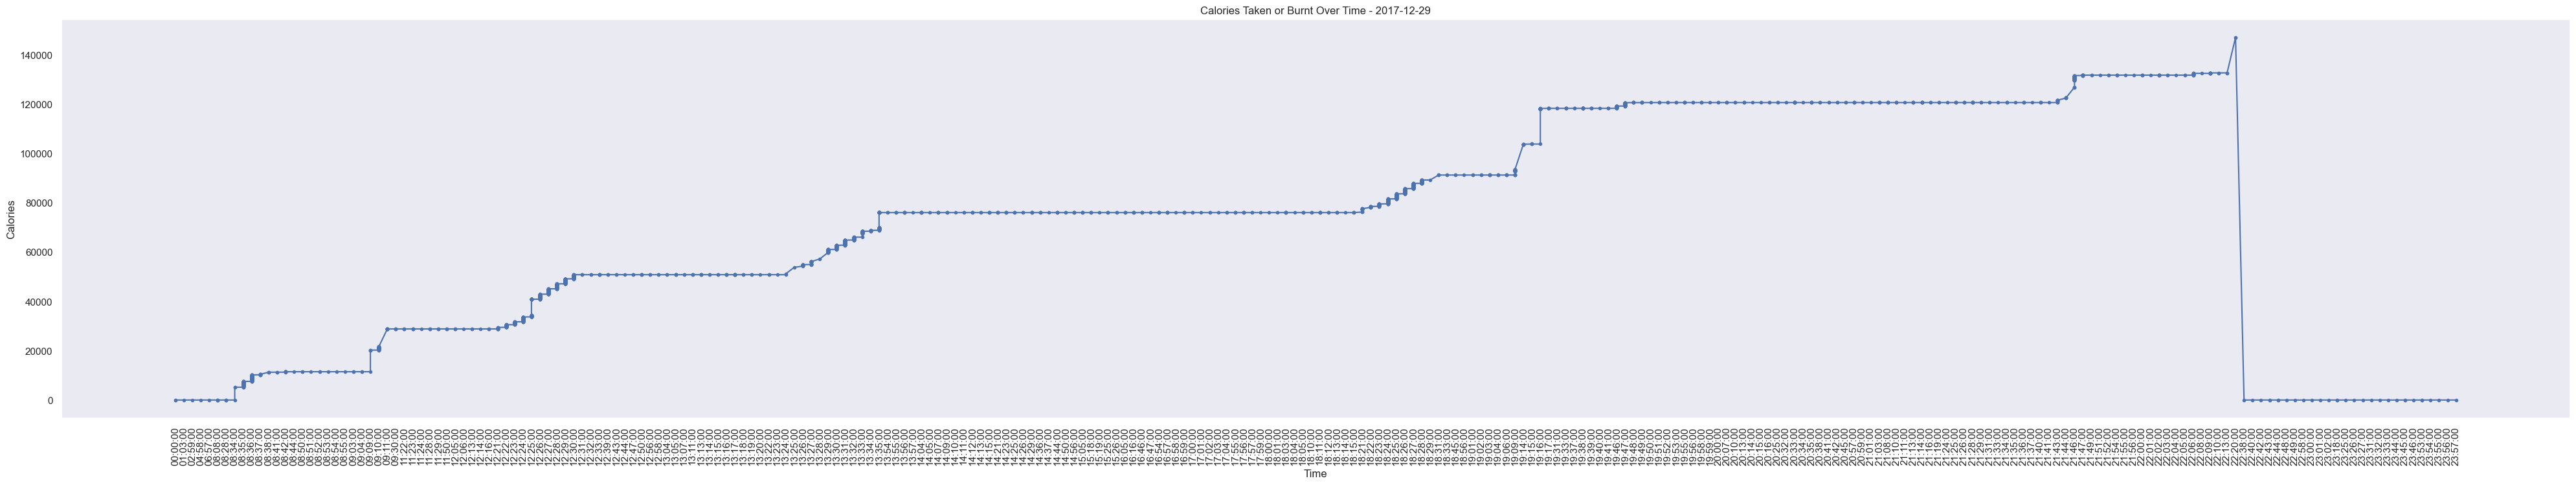

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

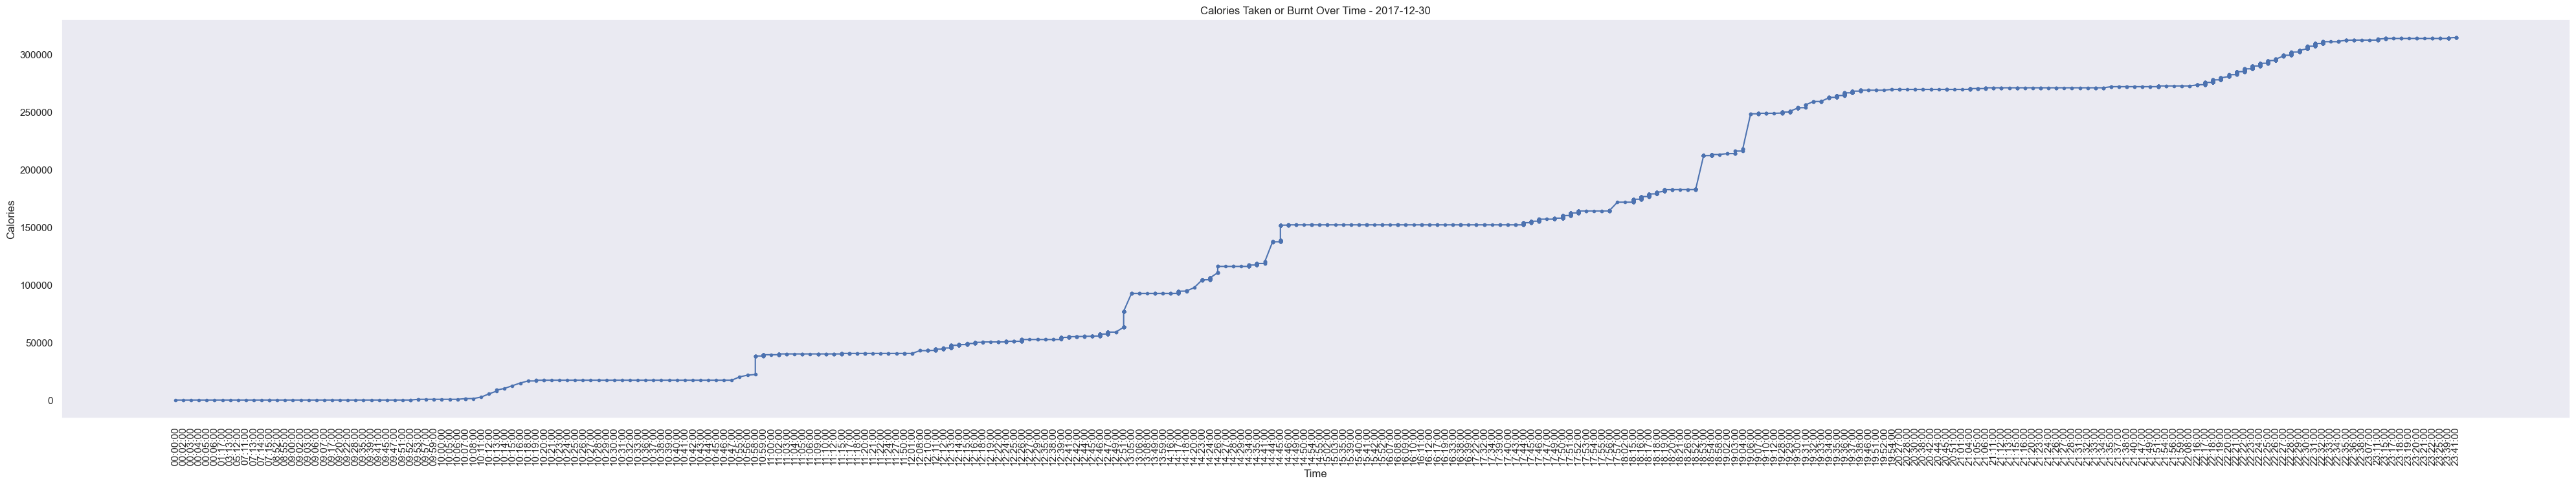

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

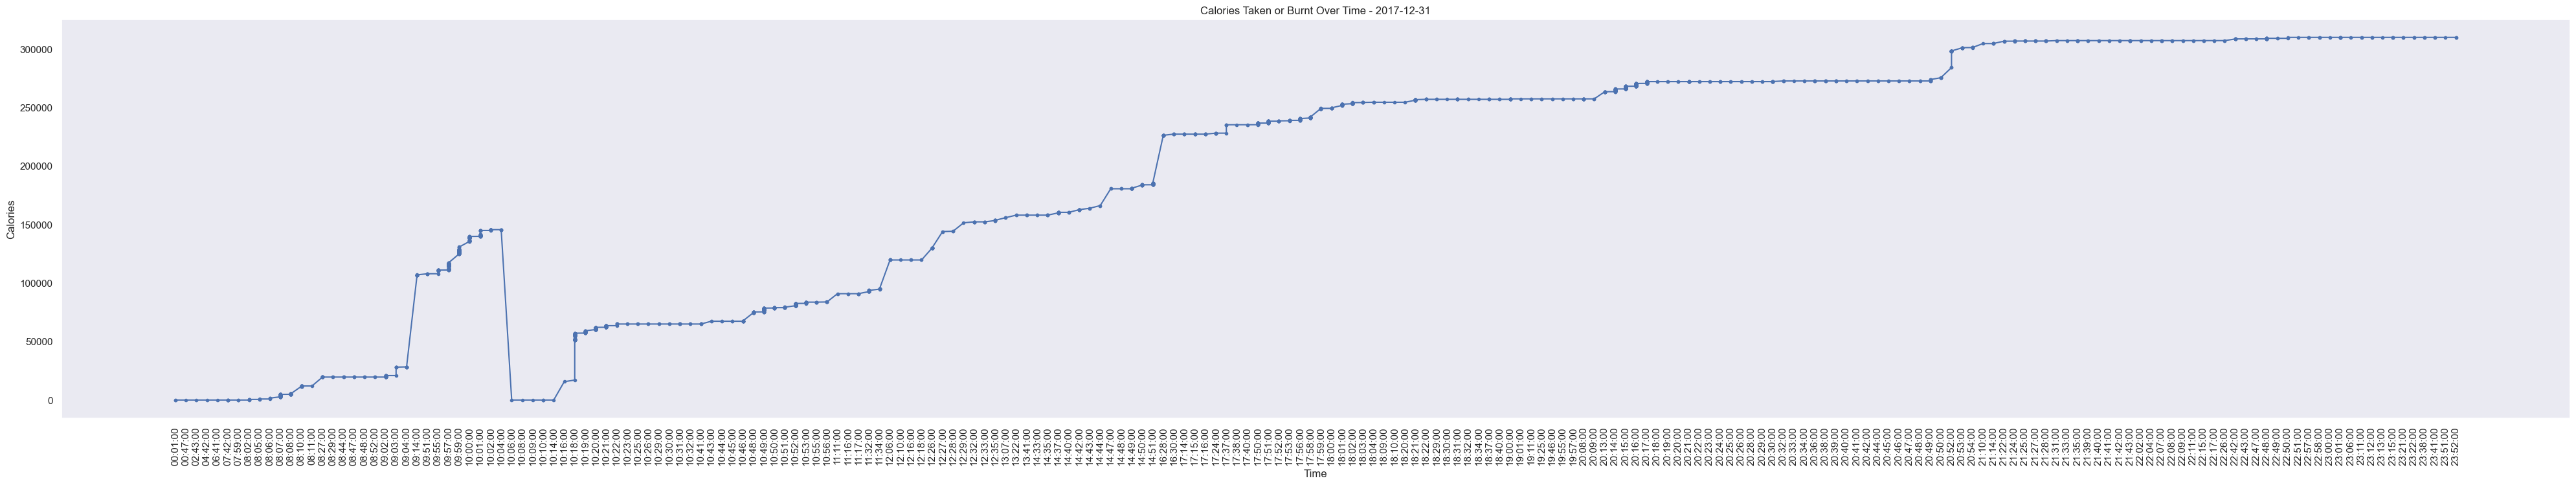

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

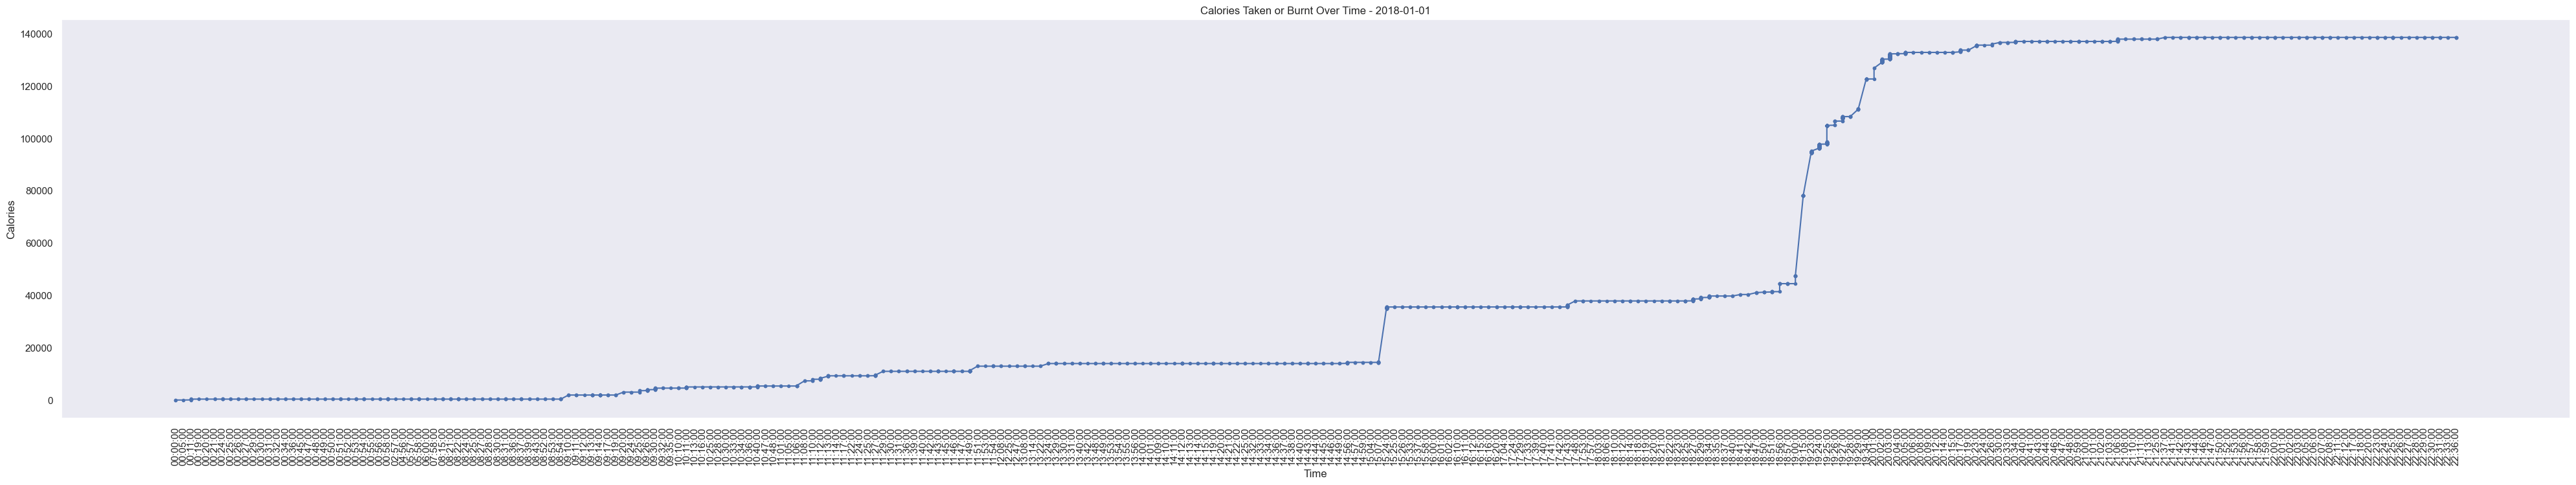

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

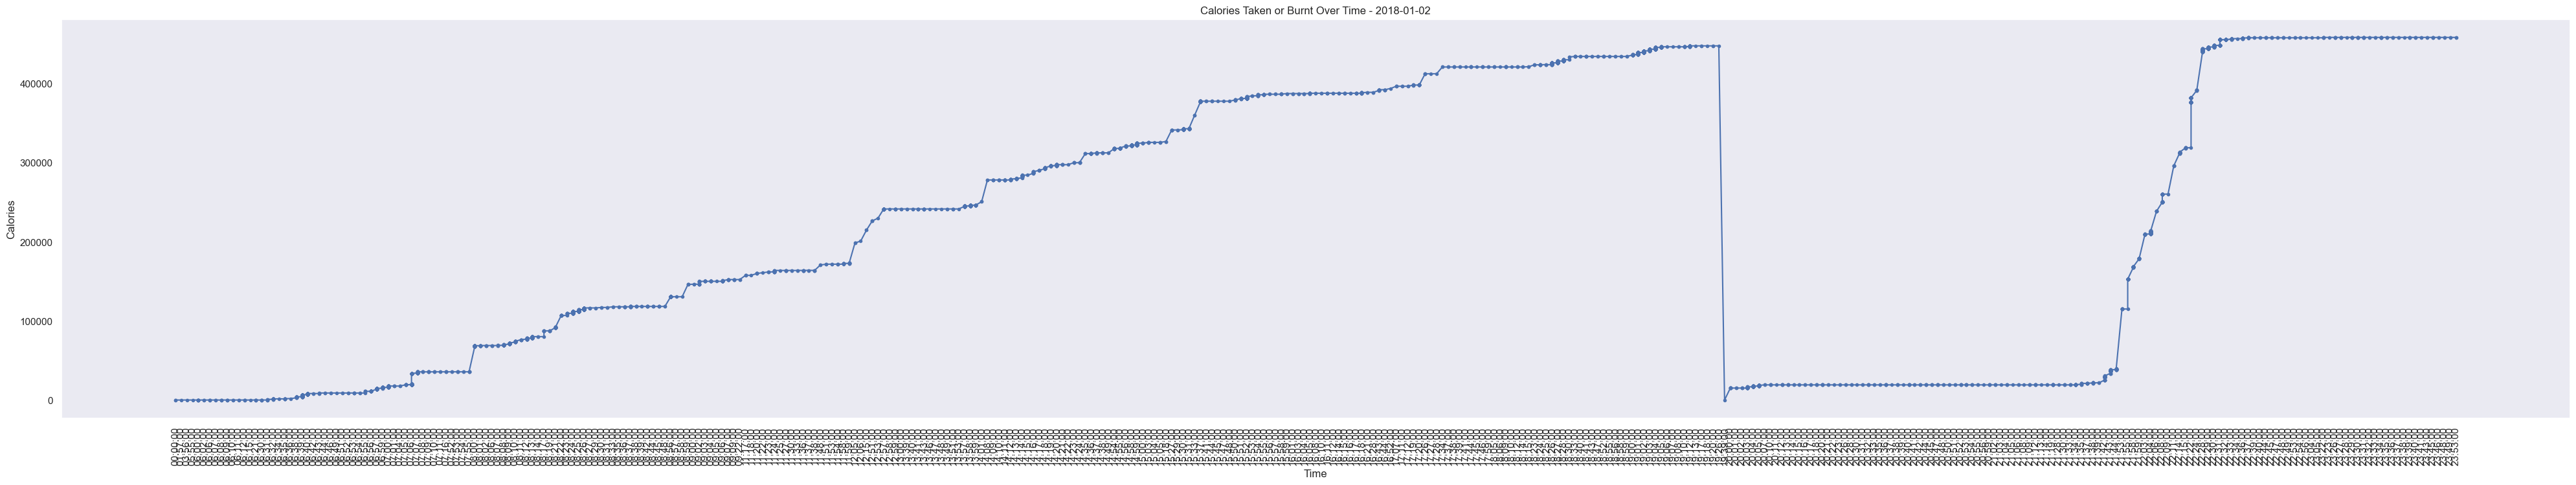

C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Calories Burnt'] = calories_df['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calories_df['Time'] = pd.to_datetime(calories_df['Time'], format='%Y%m%d-%H:%M:%S:%f')
C:\Users\Deboleen\AppData\Local\Temp\ipykernel_12916\471855206.py:16: SettingWithCopyWar

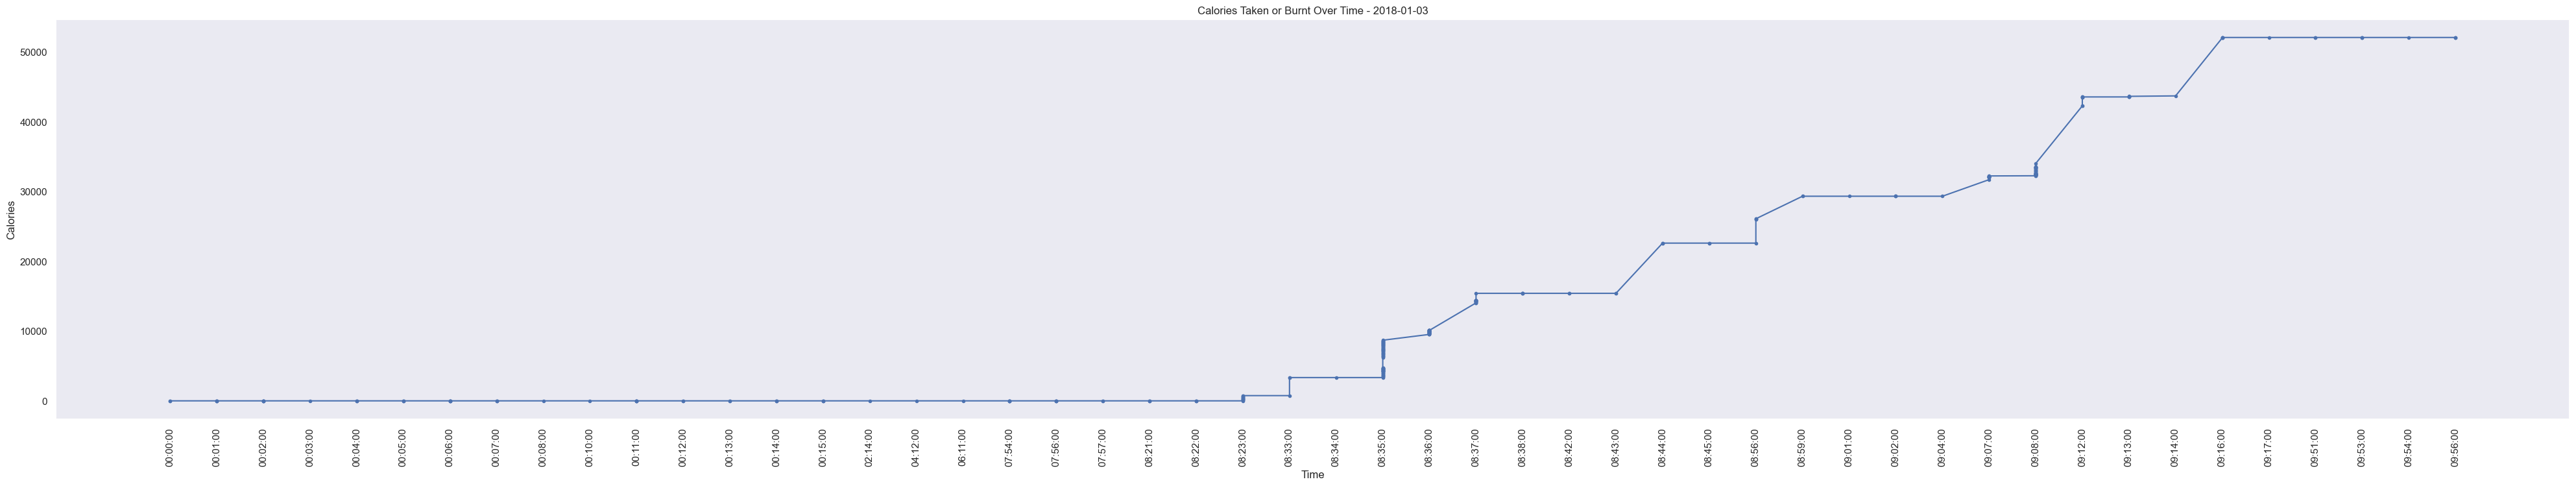

In [ ]:
# Plotting for Calories gained and burnt per day
for i, data_df in enumerate(date_dataframes, 1):
    plot_calories_burnt_over_time(data_df)

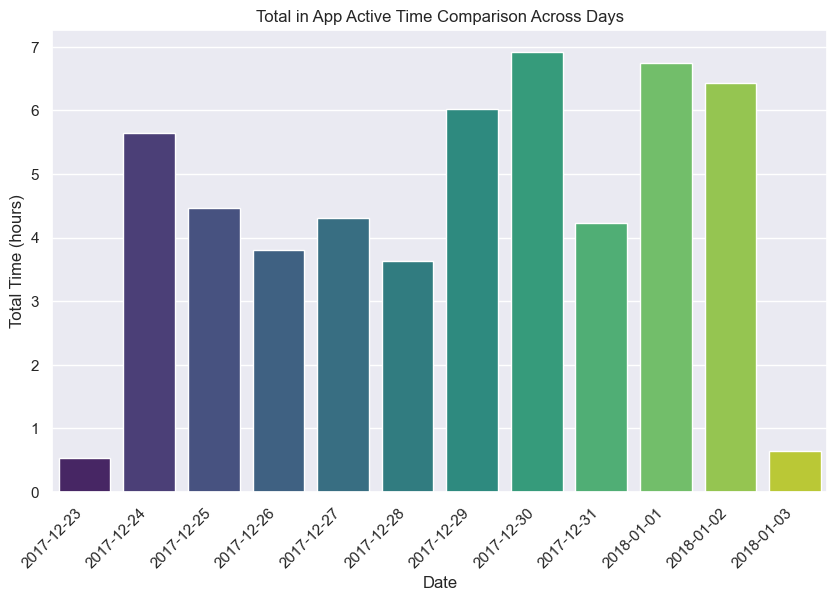

In [ ]:
# To compare the total time the person was online
plot_total_time_comparison(date_dataframes)

In [ ]:
s_df=df

In [ ]:
# Extract stand step changed values
stand_step_changed_pattern = re.compile(r'onStandStepChanged (\d+)')
s_df['steps'] = s_df['Content'].str.extract(stand_step_changed_pattern, expand=False).astype(float)

In [ ]:
s_df

,Component,Pid,Content,Date,StandStepChanged,steps
Time,,,,,,
2017-12-23 22:15:00,Step_LSC,30002312,onStandStepChanged 3579,2017-12-23,3579.0,3579.0
2017-12-23 22:15:00,Step_LSC,30002312,onExtend:1514038530000 14 0 4,2017-12-23,NaN,NaN
2017-12-23 22:15:00,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,2017-12-23,NaN,NaN
2017-12-23 22:15:00,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,2017-12-23,NaN,NaN
2017-12-23 22:15:00,Step_StandStepCounter,30002312,flush sensor data,2017-12-23,NaN,NaN
...,...,...,...,...,...,...
2018-01-03 09:56:00,Step_ExtSDM,30002312,calculateCaloriesWithCache totalCalories=52108,2018-01-03,NaN,NaN
2018-01-03 09:56:00,Step_ExtSDM,30002312,calculateAltitudeWithCache totalAltitude=60,2018-01-03,NaN,NaN
2018-01-03 09:57:00,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,2018-01-03,NaN,NaN


In [ ]:
# Function to calculate the total times when steps data is constant
def calculate_constant_duration(data):
    count = 0
    last_value = None
    total_duration = timedelta()

    for value, group in data.groupby(data.ne(data.shift()).cumsum()):
        if value == 0:
            # If value is zero, update last_value and continue counting
            last_value = value
            count += len(group)
            total_duration += group.index[-1] - group.index[0]
        elif last_value is not None and last_value != value:
            # If value changes from zero or a constant, reset count and duration
            count = len(group)
            total_duration = timedelta()
            last_value = value
        else:
            # If the value is constant, continue counting and update duration
            count += len(group)
            total_duration += group.index[-1] - group.index[0]

        if total_duration >= pd.to_timedelta('1 hour'):
            # If the total duration is at least 1 hour, increment count
            count += 1
            total_duration = timedelta()

    return count/3600

# To apply the function day-wise
Sleep_time = s_df.groupby(s_df.index.date)['steps'].apply(calculate_constant_duration)

In [ ]:
Sleep_time

2017-12-23     0.493333
2017-12-24    10.020556
2017-12-25     7.959722
2017-12-26     5.860833
2017-12-27     3.993889
2017-12-28     4.016944
2017-12-29     6.221111
2017-12-30     9.875278
2017-12-31     5.858333
2018-01-01     3.739722
2018-01-02    11.370556
2018-01-03     0.977222
Name: steps, dtype: float64

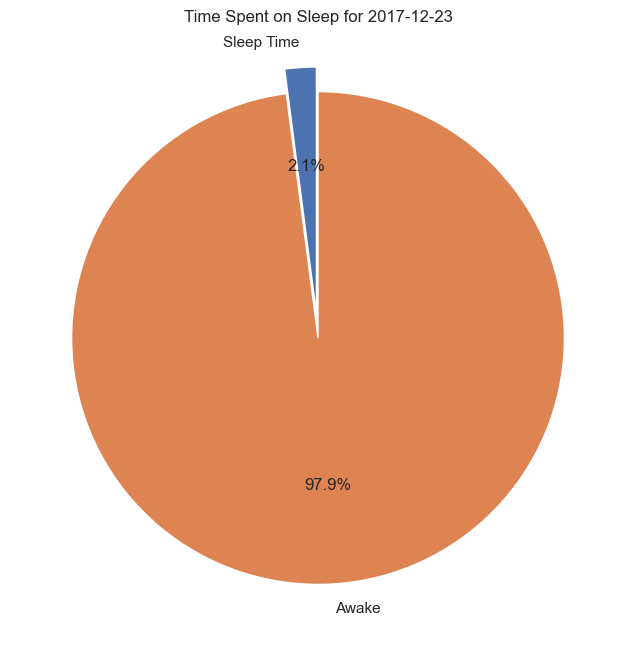

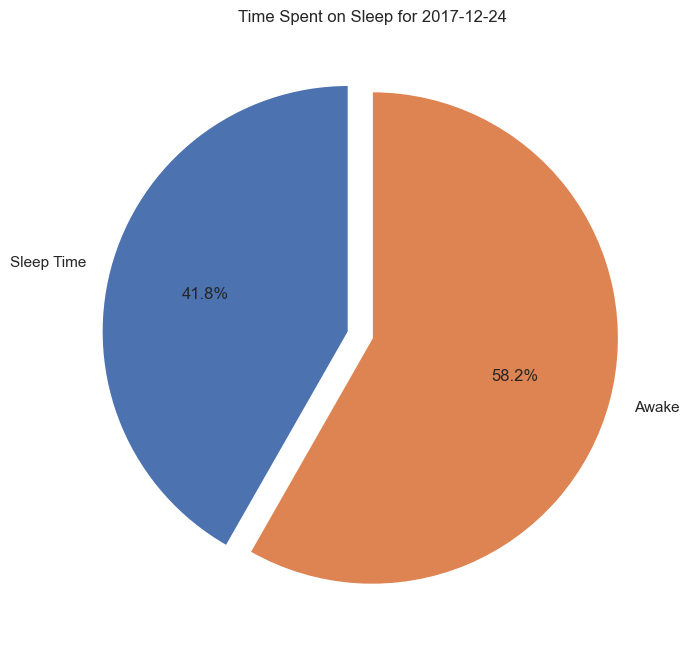

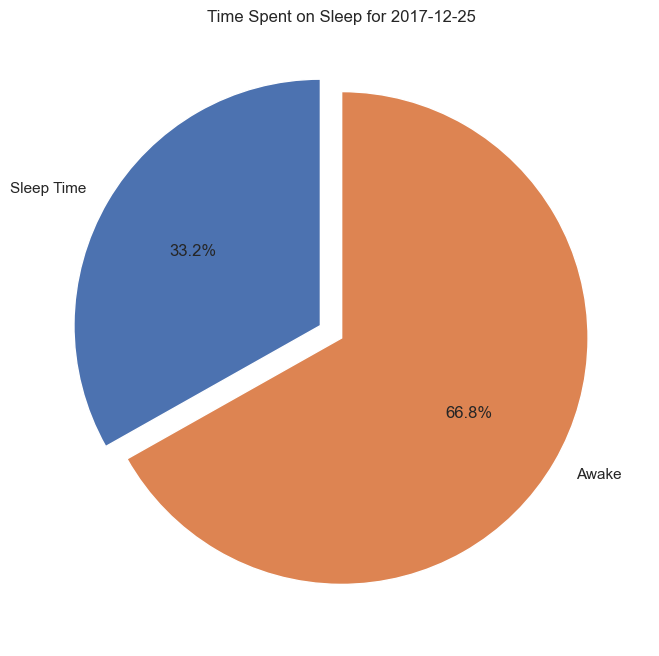

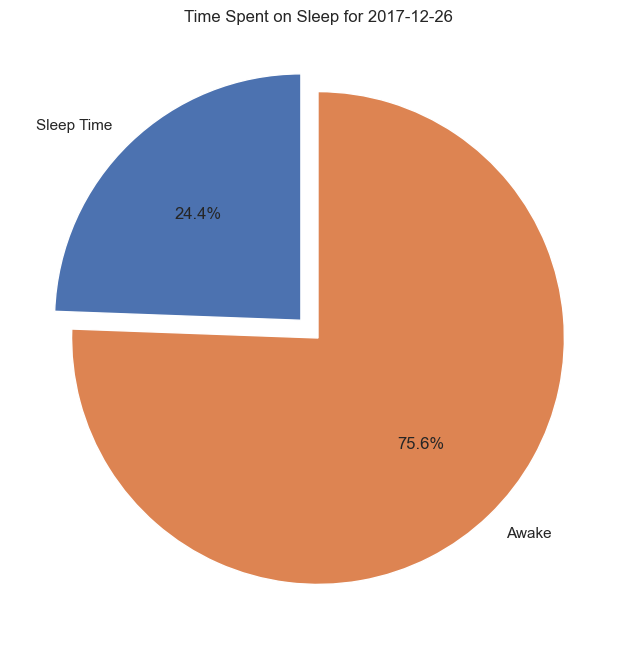

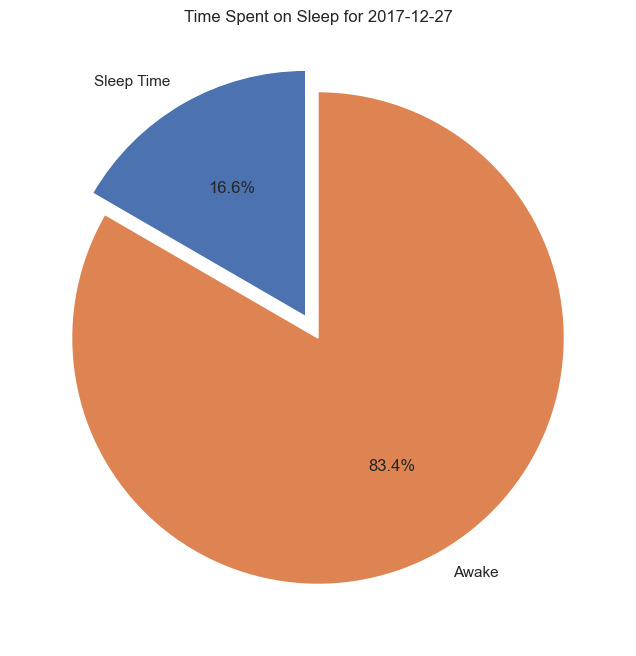

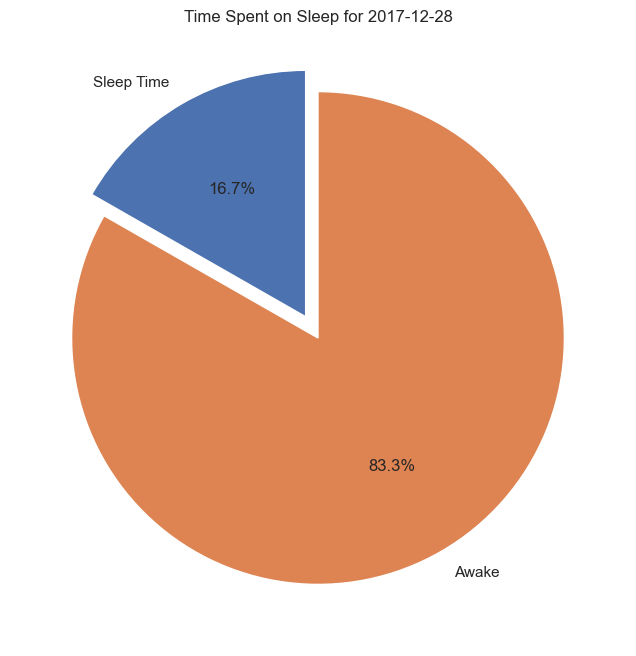

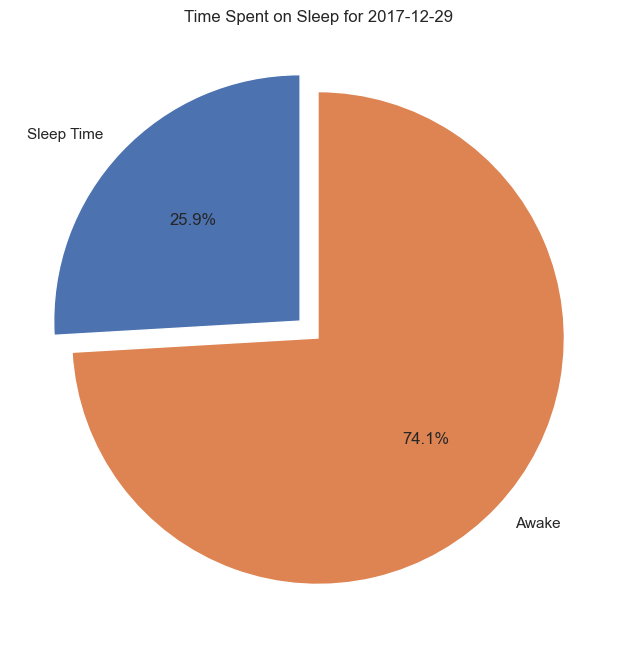

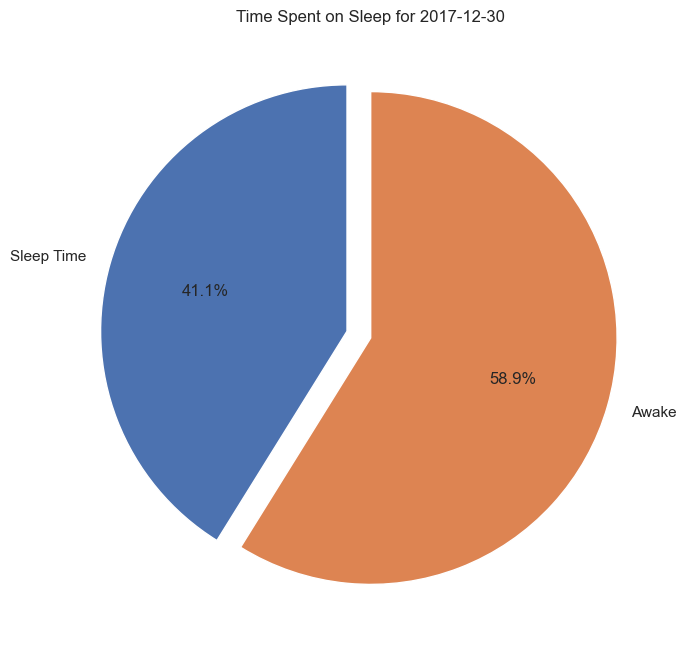

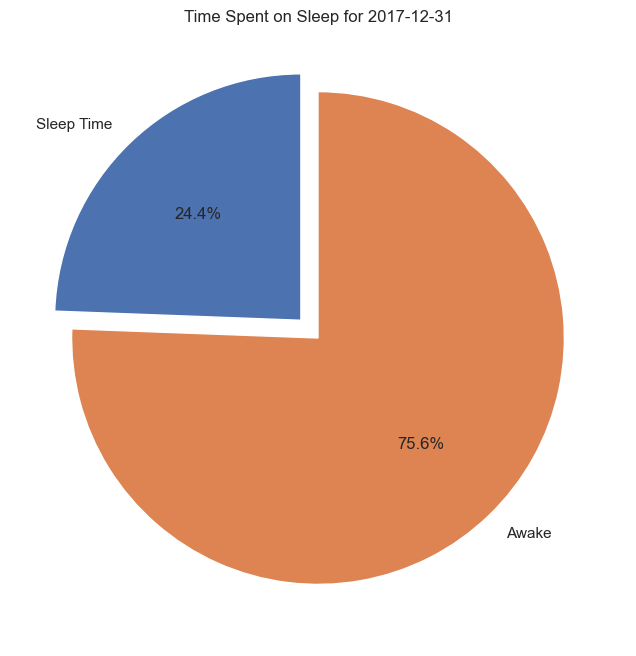

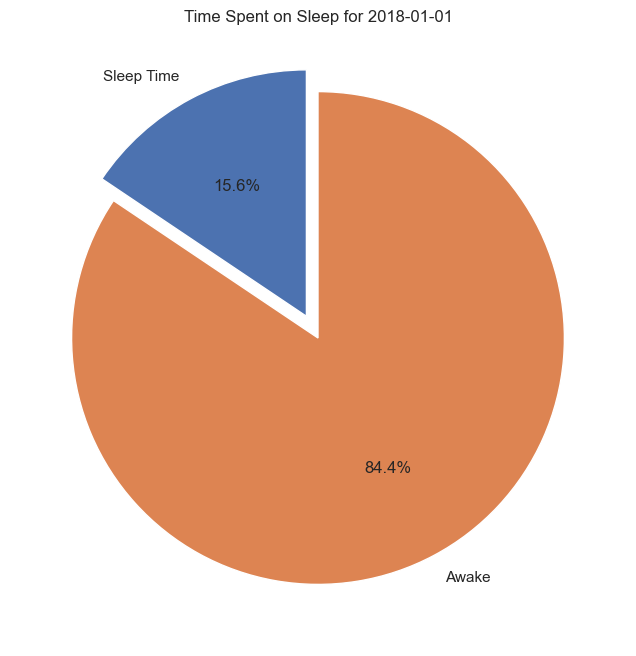

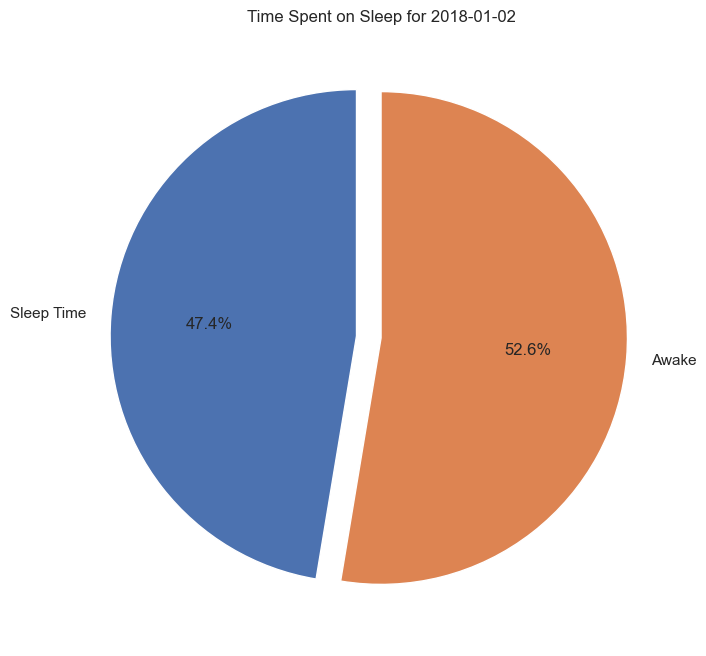

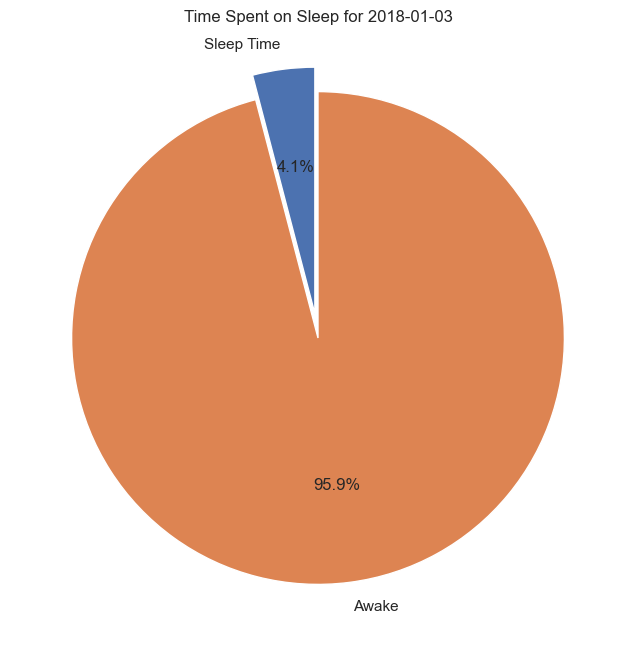

In [ ]:
# Plot pie chart for each day to check for sleeping time
for date, total_time in Sleep_time.items():
    plt.figure(figsize=(8, 8))
    explode = (0.1, 0)
    sns.set()
    plt.pie([total_time, 24 - total_time], explode = explode, labels=['Sleep Time', 'Awake'], autopct='%1.1f%%', startangle=90)
    plt.title(f'Time Spent on Sleep for {date}')
    plt.show()

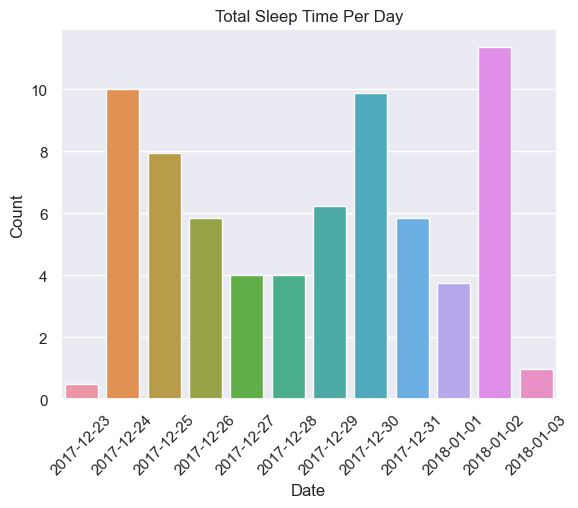

In [ ]:
# Plot to compare the sleep data per day
sns.barplot(x=Sleep_time.index, y=Sleep_time)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Sleep Time Per Day')
plt.xticks(rotation=45)
plt.show()